In [78]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-04-21 10:02:53.336036


In [285]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
from PIL import Image
from io import BytesIO
import requests
from random import shuffle

In [80]:
DataFolderMainPath = os.path.join(os.getcwd(),'Data','food101datasets','images')
DataFolderMainPath

'C:\\Shalgham\\DataScience\\envs\\tensorflow_cnn_review\\Data\\food101datasets\\images'

In [81]:
pizza_path = os.path.join(DataFolderMainPath,'pizza')
pizza_path

'C:\\Shalgham\\DataScience\\envs\\tensorflow_cnn_review\\Data\\food101datasets\\images\\pizza'

In [82]:
steak_path = os.path.join(DataFolderMainPath,'steak')
steak_path

'C:\\Shalgham\\DataScience\\envs\\tensorflow_cnn_review\\Data\\food101datasets\\images\\steak'

In [83]:
class_names = ['pizza', 'steak']

In [84]:
def view_random_image(target_dir, target_class=None):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class if target_class != None else target_dir
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (382, 512, 3)


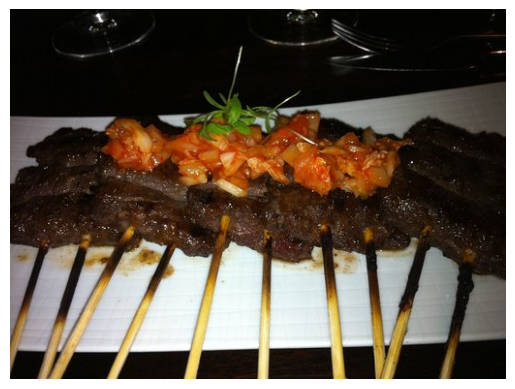

In [85]:
img = view_random_image(steak_path)

Image shape: (512, 512, 3)


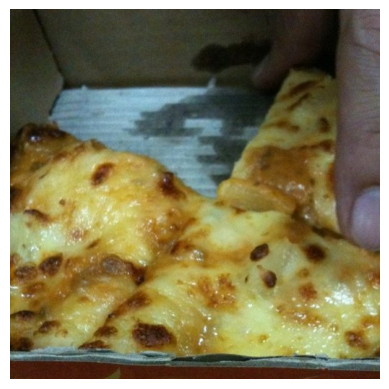

In [86]:
img = view_random_image(pizza_path)

In [87]:
img.shape

(512, 512, 3)

#### Build Model Bases On <span style='color:yellow'>VGG16</span> Model

In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [89]:
tf.random.set_seed(42)

In [90]:
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [91]:
pizza_path, steak_path

('C:\\Shalgham\\DataScience\\envs\\tensorflow_cnn_review\\Data\\food101datasets\\images\\pizza',
 'C:\\Shalgham\\DataScience\\envs\\tensorflow_cnn_review\\Data\\food101datasets\\images\\steak')

In [92]:
len(os.listdir(pizza_path)), len(os.listdir(steak_path))

(1000, 1000)

In [93]:
class_names

['pizza', 'steak']

In [94]:
piza_images_full_path = []
for img in os.listdir(pizza_path):
    object_to_append = {
        'X':os.path.join(pizza_path, img),
        'y':class_names[0]
    }
    piza_images_full_path.append(object_to_append)

In [95]:
piza_images_full_path[0]

{'X': 'C:\\Shalgham\\DataScience\\envs\\tensorflow_cnn_review\\Data\\food101datasets\\images\\pizza\\1001116.jpg',
 'y': 'pizza'}

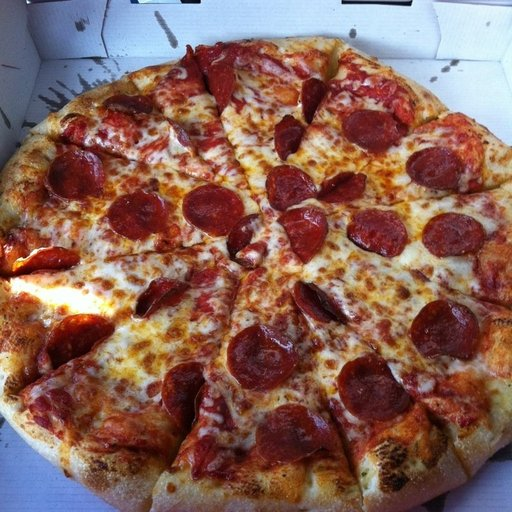

In [96]:
Image.open(piza_images_full_path[0]['X'])

In [97]:
seak_images_full_path = []
for img in os.listdir(steak_path):
    object_to_append = {
        'X':os.path.join(steak_path, img),
        'y':class_names[1]
    }
    seak_images_full_path.append(object_to_append)

In [98]:
seak_images_full_path[0]['y']

'steak'

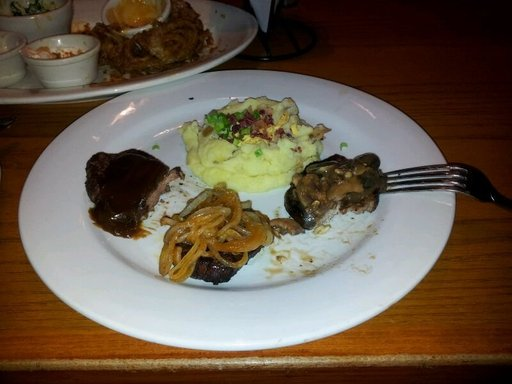

In [99]:
Image.open(seak_images_full_path[0]['X'])

In [100]:
piza_images_full_path.extend(seak_images_full_path)

In [101]:
len(piza_images_full_path)

2000

In [102]:
shuffle(piza_images_full_path)
#piza_images_full_path

In [103]:
pizza_steak_list = piza_images_full_path
#pizza_steak_list

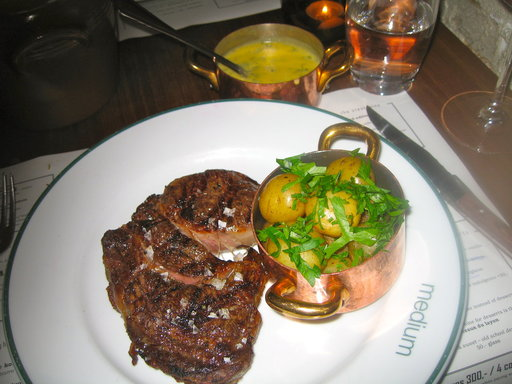

In [153]:
r = random.sample(pizza_steak_list,1)
v = os.path.join(steak_path,r[0]['X'])
Image.open(v)

In [105]:
len(pizza_steak_list)

2000

In [106]:
pizza_steak_list_df = pd.DataFrame(pizza_steak_list)

In [107]:
pizza_steak_list_df.head(3)

X      y
0  C:\Shalgham\DataScience\envs\tensorflow_cnn_re...  steak
1  C:\Shalgham\DataScience\envs\tensorflow_cnn_re...  pizza
2  C:\Shalgham\DataScience\envs\tensorflow_cnn_re...  pizza

#### Split Data

In [108]:
train_df = pizza_steak_list_df.iloc[:1400,:]
test_df = pizza_steak_list_df.iloc[1400:,:]

In [109]:
train_df.shape, test_df.shape

((1400, 2), (600, 2))

In [110]:
train_df.sample(5)

X      y
329  C:\Shalgham\DataScience\envs\tensorflow_cnn_re...  steak
403  C:\Shalgham\DataScience\envs\tensorflow_cnn_re...  steak
75   C:\Shalgham\DataScience\envs\tensorflow_cnn_re...  pizza
115  C:\Shalgham\DataScience\envs\tensorflow_cnn_re...  steak
618  C:\Shalgham\DataScience\envs\tensorflow_cnn_re...  steak

In [111]:
test_df.sample(10)

X      y
1930  C:\Shalgham\DataScience\envs\tensorflow_cnn_re...  pizza
1924  C:\Shalgham\DataScience\envs\tensorflow_cnn_re...  steak
1606  C:\Shalgham\DataScience\envs\tensorflow_cnn_re...  steak
1795  C:\Shalgham\DataScience\envs\tensorflow_cnn_re...  steak
1966  C:\Shalgham\DataScience\envs\tensorflow_cnn_re...  pizza
1982  C:\Shalgham\DataScience\envs\tensorflow_cnn_re...  steak
1630  C:\Shalgham\DataScience\envs\tensorflow_cnn_re...  pizza
1782  C:\Shalgham\DataScience\envs\tensorflow_cnn_re...  pizza
1411  C:\Shalgham\DataScience\envs\tensorflow_cnn_re...  steak
1718  C:\Shalgham\DataScience\envs\tensorflow_cnn_re...  steak

In [112]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [113]:
train_data = train_datagen.flow_from_dataframe(dataframe=train_df,x_col='X', y_col='y',batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

Found 1400 validated image filenames belonging to 2 classes.


In [114]:
valid_data = valid_datagen.flow_from_dataframe(test_df, x_col='X', y_col='y',
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 600 validated image filenames belonging to 2 classes.


In [115]:

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
44/44 [==============================] - 8s 175ms/step - loss: 0.6240 - accuracy: 0.6300 - val_loss: 0.5815 - val_accuracy: 0.6733
Epoch 2/5
44/44 [==============================] - 7s 152ms/step - loss: 0.4759 - accuracy: 0.7793 - val_loss: 0.4057 - val_accuracy: 0.8217
Epoch 3/5
44/44 [==============================] - 7s 149ms/step - loss: 0.3873 - accuracy: 0.8321 - val_loss: 0.3785 - val_accuracy: 0.8400
Epoch 4/5
44/44 [==============================] - 7s 148ms/step - loss: 0.3587 - accuracy: 0.8536 - val_loss: 0.3769 - val_accuracy: 0.8417
Epoch 5/5
44/44 [==============================] - 7s 149ms/step - loss: 0.3273 - accuracy: 0.8686 - val_loss: 0.4106 - val_accuracy: 0.8317


In [116]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [117]:
test_df[:1]

X      y
1400  C:\Shalgham\DataScience\envs\tensorflow_cnn_re...  pizza

In [118]:
img = Image.open(test_df[:1].values[0][0])

In [119]:
img = mpimg.imread(test_df[:1].values[0][0])

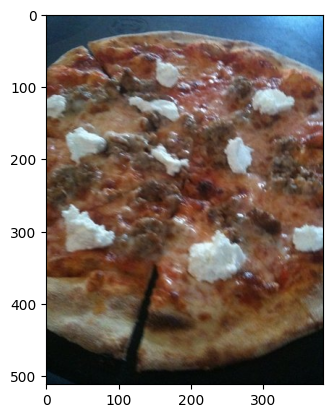

In [120]:
plt.imshow(img)

In [121]:
res  = train_data.image_data_generator.apply_transform(img,transform_parameters = {'ty':-20})

In [122]:
img.shape

(512, 384, 3)

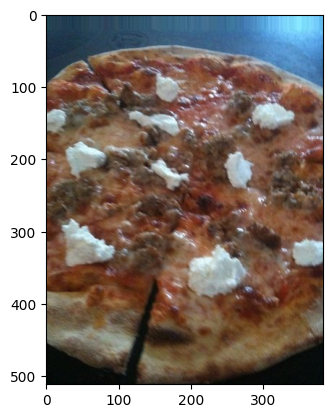

In [123]:
plt.imshow(res)

In [124]:
res.shape

(512, 384, 3)

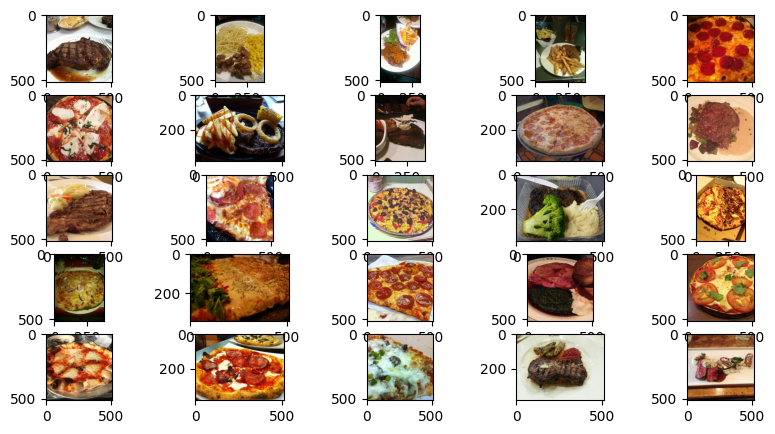

In [125]:
tstList = list(test_df.iloc[:, 0:1].values.ravel())
plt.figure(figsize=(10, 5))
for i in range(0, 25):
    img = Image.open(tstList[i+1])
    plt.subplot(5, 5, i+1)
    plt.imshow(img)

In [126]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
44/44 [==============================] - 4s 87ms/step - loss: 0.6987 - accuracy: 0.4979 - val_loss: 0.6932 - val_accuracy: 0.4917
Epoch 2/5
44/44 [==============================] - 4s 81ms/step - loss: 0.6932 - accuracy: 0.5036 - val_loss: 0.6932 - val_accuracy: 0.4917
Epoch 3/5
44/44 [==============================] - 4s 82ms/step - loss: 0.6932 - accuracy: 0.5036 - val_loss: 0.6932 - val_accuracy: 0.4917
Epoch 4/5
44/44 [==============================] - 4s 83ms/step - loss: 0.6932 - accuracy: 0.5036 - val_loss: 0.6932 - val_accuracy: 0.4917
Epoch 5/5
44/44 [==============================] - 4s 83ms/step - loss: 0.6932 - accuracy: 0.5036 - val_loss: 0.6932 - val_accuracy: 0.4917


In [127]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_9 (Dense)             (None, 4)                 602116    
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [128]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
44/44 [==============================] - 8s 171ms/step - loss: 4.6996 - accuracy: 0.5700 - val_loss: 1.5148 - val_accuracy: 0.6633
Epoch 2/5
44/44 [==============================] - 7s 167ms/step - loss: 0.6844 - accuracy: 0.7543 - val_loss: 0.5030 - val_accuracy: 0.7833
Epoch 3/5
44/44 [==============================] - 7s 169ms/step - loss: 0.6277 - accuracy: 0.7471 - val_loss: 1.2171 - val_accuracy: 0.6467
Epoch 4/5
44/44 [==============================] - 7s 169ms/step - loss: 0.6946 - accuracy: 0.7500 - val_loss: 0.5367 - val_accuracy: 0.7567
Epoch 5/5
44/44 [==============================] - 7s 166ms/step - loss: 0.5058 - accuracy: 0.7807 - val_loss: 0.4903 - val_accuracy: 0.7950


In [129]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_12 (Dense)            (None, 100)               15052900  
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [130]:
from tensorflow.keras.utils import plot_model

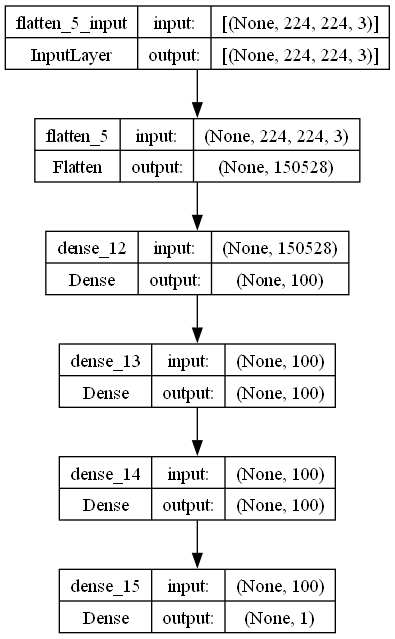

In [131]:
plot_model(model_3, show_shapes=True)

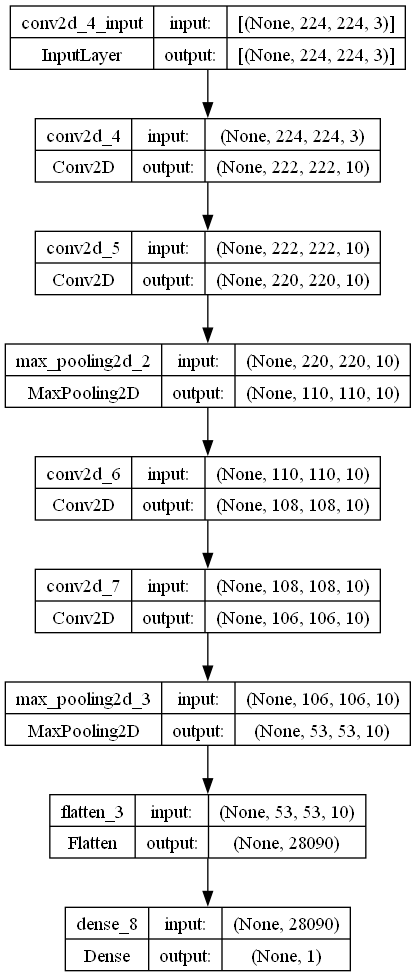

In [132]:
plot_model(model_1, show_shapes=True)

In [133]:
train_data, valid_data

(<keras.src.preprocessing.image.DataFrameIterator at 0x2c3d34ace90>,
 <keras.src.preprocessing.image.DataFrameIterator at 0x2c41001a750>)

In [134]:
images, label = train_data.next()

In [135]:
len(images), label

(32,
 array([1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
        1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.],
       dtype=float32))

In [136]:
images[0].shape

(224, 224, 3)

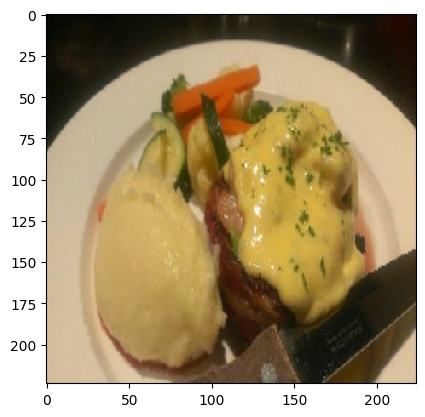

In [137]:
plt.imshow(images[1])

In [138]:
train_data.class_indices

{'pizza': 0, 'steak': 1}

#### Rebuild reformat The Model

In [145]:
len(train_data), len(valid_data)

(44, 19)

In [141]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

In [148]:
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, padding='valid', activation='relu', input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(units=1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
44/44 [==============================] - 8s 168ms/step - loss: 1.8296 - accuracy: 0.5486 - val_loss: 0.6060 - val_accuracy: 0.6200
Epoch 2/5
44/44 [==============================] - 7s 164ms/step - loss: 0.5132 - accuracy: 0.7293 - val_loss: 0.5341 - val_accuracy: 0.7467
Epoch 3/5
44/44 [==============================] - 7s 167ms/step - loss: 0.3721 - accuracy: 0.8450 - val_loss: 0.5110 - val_accuracy: 0.7600
Epoch 4/5
44/44 [==============================] - 7s 169ms/step - loss: 0.2512 - accuracy: 0.9207 - val_loss: 0.5035 - val_accuracy: 0.7767
Epoch 5/5
44/44 [==============================] - 7s 165ms/step - loss: 0.1226 - accuracy: 0.9693 - val_loss: 0.5550 - val_accuracy: 0.7650


#### Evaluate the model

In [154]:
model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_15 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_16 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_8 (Flatten)         (None, 475240)            0         
                                                                 
 dense_18 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


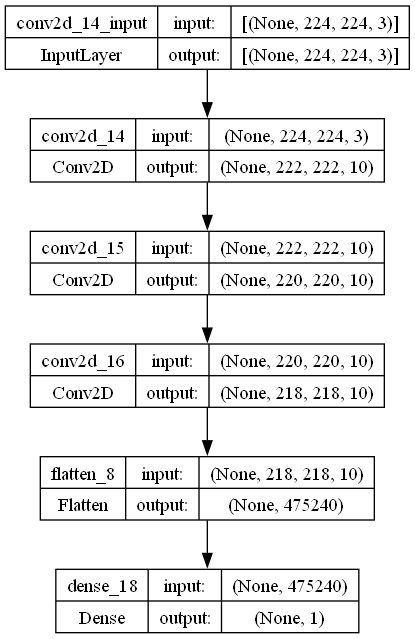

In [155]:
plot_model(model_4, show_shapes=True)

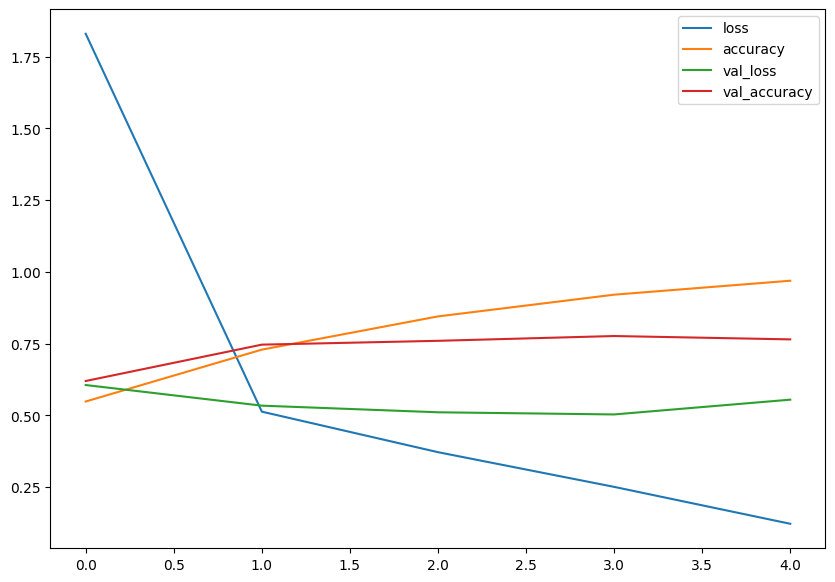

In [156]:
pd.DataFrame(history_4.history).plot(figsize=(10, 7))
plt.show()

In [159]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

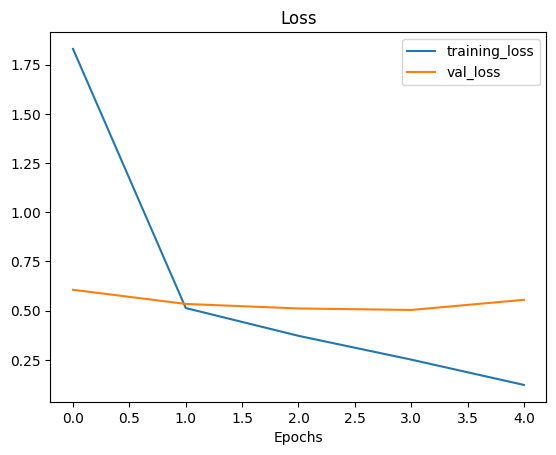

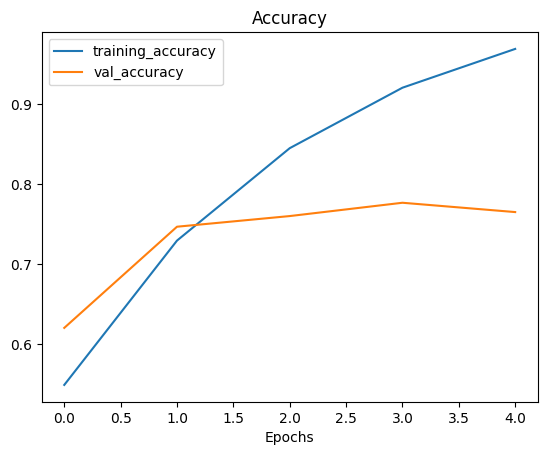

In [160]:
plot_loss_curves(history_4)

##### The Model Overfitting ( Gap Between validation And training Loss ) :) Adjust the model parameters
 - MaxPool2D

In [161]:
model_5 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, padding='valid', activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(units=1, activation='sigmoid')
])

model_5.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
44/44 [==============================] - 6s 125ms/step - loss: 0.6466 - accuracy: 0.6100 - val_loss: 0.5538 - val_accuracy: 0.7383
Epoch 2/5
44/44 [==============================] - 5s 118ms/step - loss: 0.5118 - accuracy: 0.7557 - val_loss: 0.4237 - val_accuracy: 0.8083
Epoch 3/5
44/44 [==============================] - 5s 123ms/step - loss: 0.4048 - accuracy: 0.8279 - val_loss: 0.4138 - val_accuracy: 0.8167
Epoch 4/5
44/44 [==============================] - 5s 122ms/step - loss: 0.3719 - accuracy: 0.8457 - val_loss: 0.3715 - val_accuracy: 0.8417
Epoch 5/5
44/44 [==============================] - 5s 116ms/step - loss: 0.3446 - accuracy: 0.8614 - val_loss: 0.3607 - val_accuracy: 0.8483


In [162]:
model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 10)       

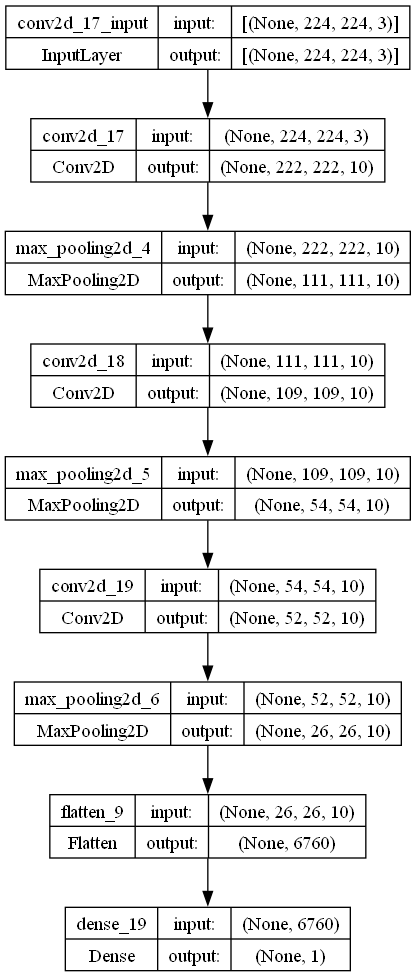

In [163]:
plot_model(show_shapes=True, model=model_5)

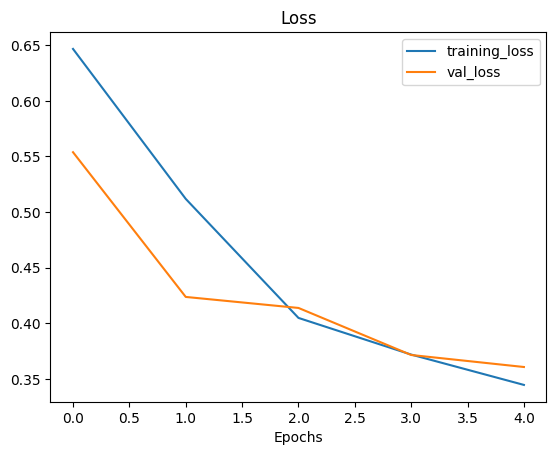

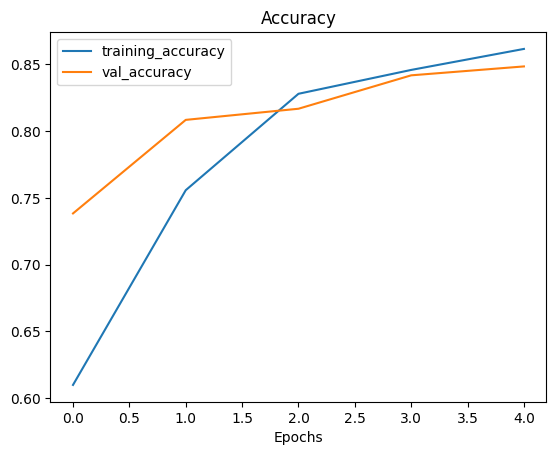

In [164]:
plot_loss_curves(history_5)

#### Applying Data Augmentation to prevent overfitting

In [185]:
train_datagen_augmented = ImageDataGenerator(rescale=1./255, rotation_range=20, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_dataframe(dataframe=train_df,x_col='X', y_col='y',batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               shuffle=True) #shuffle=False => Casue Not Good result


Found 1400 validated image filenames belonging to 2 classes.


In [186]:
images, Labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

(<matplotlib.image.AxesImage at 0x2c4465f62d0>,)

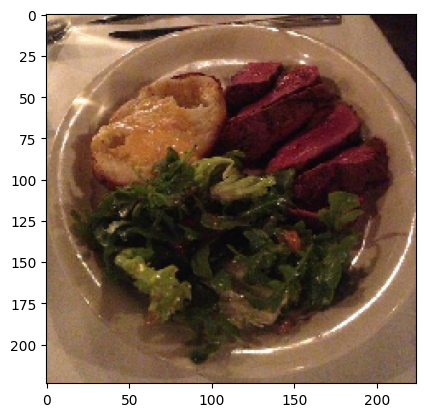

In [187]:
plt.imshow(images[0]),

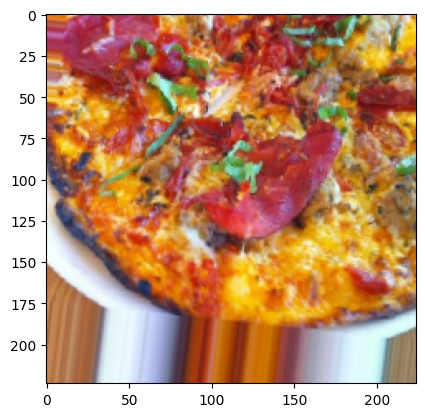

In [188]:
plt.imshow(augmented_images[0])

In [179]:
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance

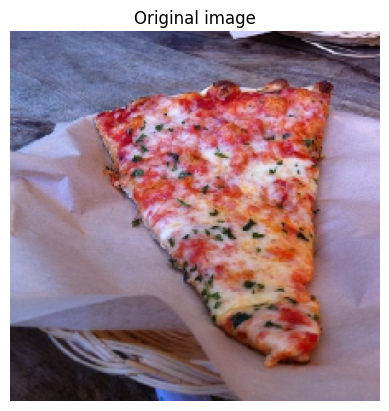

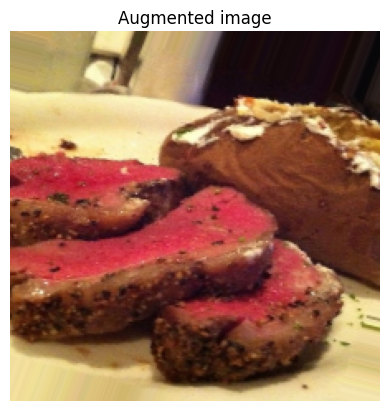

In [189]:
# Show original image and augmented image
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [193]:
model_6 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, padding='valid', activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(units=1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
44/44 [==============================] - 14s 299ms/step - loss: 0.6607 - accuracy: 0.6164 - val_loss: 0.5502 - val_accuracy: 0.7733
Epoch 2/5
44/44 [==============================] - 13s 296ms/step - loss: 0.5527 - accuracy: 0.7221 - val_loss: 0.4387 - val_accuracy: 0.7867
Epoch 3/5
44/44 [==============================] - 13s 298ms/step - loss: 0.4968 - accuracy: 0.7636 - val_loss: 0.4124 - val_accuracy: 0.8167
Epoch 4/5
44/44 [==============================] - 13s 302ms/step - loss: 0.4731 - accuracy: 0.7764 - val_loss: 0.4055 - val_accuracy: 0.8183
Epoch 5/5
44/44 [==============================] - 13s 302ms/step - loss: 0.4607 - accuracy: 0.7829 - val_loss: 0.3772 - val_accuracy: 0.8433


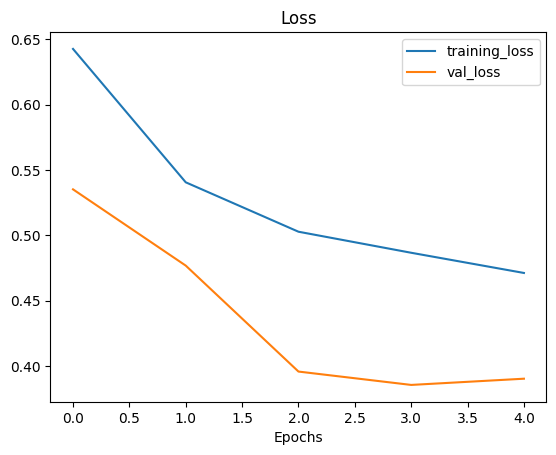

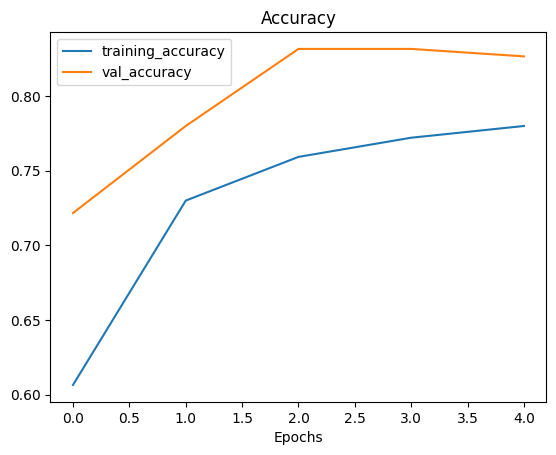

In [191]:
plot_loss_curves(history_6)

#### Repeat until satisified

In [194]:
model_7 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, padding='valid', activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(units=1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/10
44/44 [==============================] - 17s 374ms/step - loss: 0.6436 - accuracy: 0.6143 - val_loss: 0.4656 - val_accuracy: 0.7900
Epoch 2/10
44/44 [==============================] - 13s 304ms/step - loss: 0.5428 - accuracy: 0.7250 - val_loss: 0.4272 - val_accuracy: 0.8117
Epoch 3/10
44/44 [==============================] - 13s 297ms/step - loss: 0.5168 - accuracy: 0.7693 - val_loss: 0.4060 - val_accuracy: 0.8250
Epoch 4/10
44/44 [==============================] - 16s 355ms/step - loss: 0.4711 - accuracy: 0.7836 - val_loss: 0.3768 - val_accuracy: 0.8267
Epoch 5/10
44/44 [==============================] - 14s 321ms/step - loss: 0.4845 - accuracy: 0.7771 - val_loss: 0.3771 - val_accuracy: 0.8417
Epoch 6/10
44/44 [==============================] - 14s 323ms/step - loss: 0.4471 - accuracy: 0.7943 - val_loss: 0.3969 - val_accuracy: 0.8317
Epoch 7/10
44/44 [==============================] - 14s 319ms/step - loss: 0.4325 - accuracy: 0.8086 - val_loss: 0.4231 - val_accuracy: 0.8200

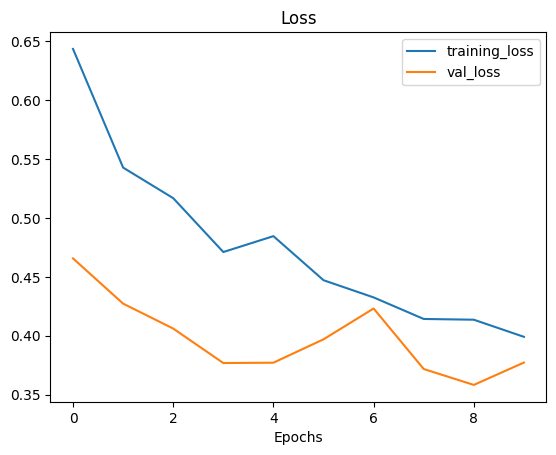

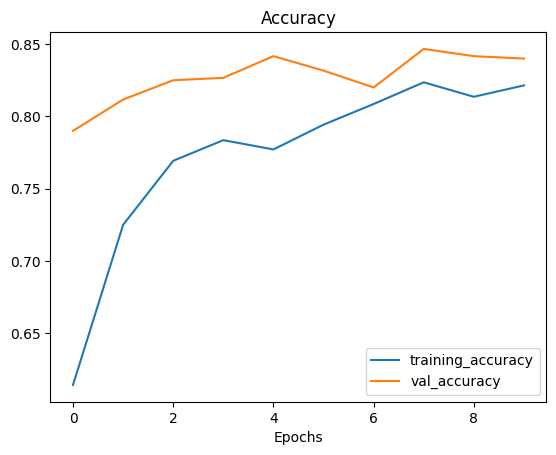

In [195]:
plot_loss_curves(history_7)

In [196]:
model_7.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 26, 26, 10)      

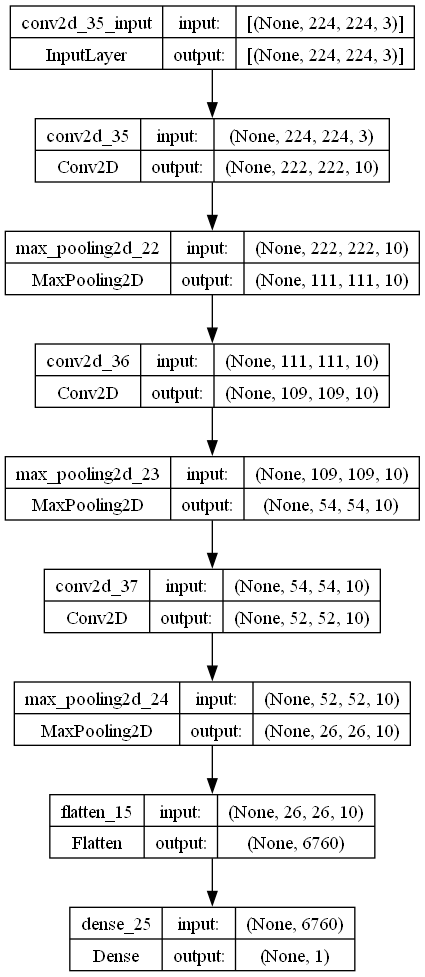

In [197]:
plot_model(model_7, show_shapes=True)

#### 
Making a prediction with our trained model

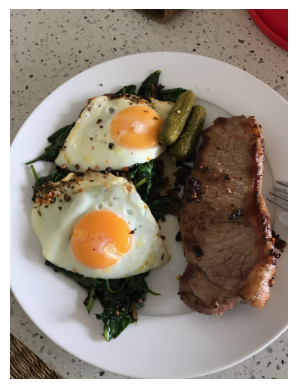

In [202]:
# View our example image
testImg01Path = os.path.join(os.getcwd(),'Data', 'food101datasets', 'TestPrediction', '03-steak.jpeg')
steak = mpimg.imread(testImg01Path)
plt.imshow(steak)
plt.axis(False);

In [203]:
steak.shape

(4032, 3024, 3)

#### Formating Image

In [335]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename = None, img_shape=224, img=None):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  if filename != None:
      img = tf.io.read_file(filename)
      # Decode the read file into a tensor & ensure 3 colour channels 
      # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
      img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [336]:
steak = load_and_prep_image(filename=testImg01Path)

In [337]:
steak.shape

TensorShape([224, 224, 3])

In [338]:
# Our Model Trained On (batch_number, h, w, c) => (32, 224, 224, 3)
steak = np.expand_dims(steak, axis=0)
pred = model_7.predict(steak)

1/1 [==============================] - 0s 28ms/step


In [210]:
steak.shape

(1, 224, 224, 3)

In [339]:
class_names[round(pred[0][0])]

'steak'

#### From Internet

In [352]:
import cv2
import urllib
import numpy as np

In [385]:
def get_formated_redy_img_from_url(url):
    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1) # 'Load it as it is'
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if img.any():
        img = tf.constant(img, dtype=tf.float32)
        return img

In [386]:
img = get_formated_redy_img_from_url('https://d1ralsognjng37.cloudfront.net/3a64a73b-b43d-4b6c-bc10-cdd32b23f141.jpeg')
img= load_and_prep_image(img=img, filename=None)

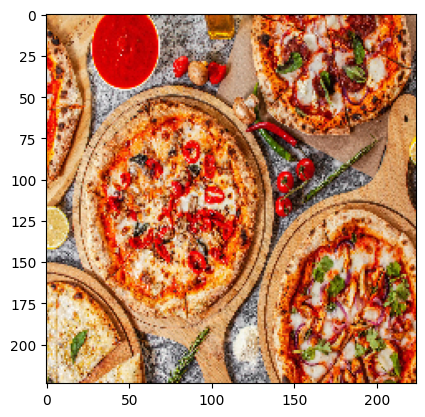

In [387]:
plt.imshow(img)

In [388]:
img = tf.expand_dims(img, axis=0)

In [389]:
img.shape

TensorShape([1, 224, 224, 3])

In [391]:
pre01 = model_7.predict(img)
pre01

1/1 [==============================] - 0s 22ms/step


array([[0.05191682]], dtype=float32)

In [392]:
class_names[round(pre01[0][0])]

'pizza'

#### Another Test

In [429]:
img = get_formated_redy_img_from_url('https://www.hot-dinners.com/images/stories/features/2024/pizza/gordos.jpg')
img= load_and_prep_image(img=img, filename=None)

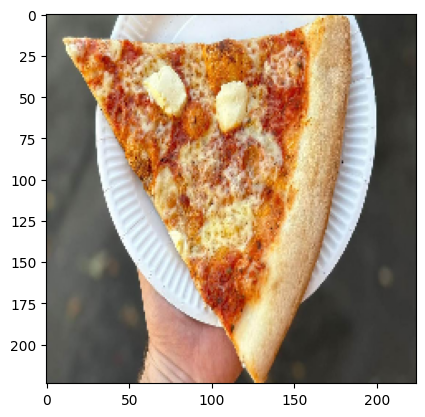

In [430]:
plt.imshow(img)

In [431]:
img.shape

TensorShape([224, 224, 3])

In [432]:
img = tf.expand_dims(img, axis=0)

In [433]:
img.shape

TensorShape([1, 224, 224, 3])

In [434]:
pre02 = model_7.predict(img)
pre02

1/1 [==============================] - 0s 24ms/step


array([[0.02220147]], dtype=float32)

In [435]:
round(pre02[0][0])

0

In [436]:
class_names[round(pre02[0][0])]

'pizza'